In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("crops.csv")

In [3]:
df.head()

,Temperature,Rainfall,Humidity,Moisture,Crop
0,NaN,NaN,NaN,NaN,NaN
1,23.0,221.0,79.0,397.0,Rice
2,NaN,NaN,NaN,NaN,NaN
3,16.0,86.0,85.0,625.0,Tomato
4,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,Temperature,Rainfall,Humidity,Moisture
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,19.757000,115.32190,61.495700,427.205800
std,5.118454,81.60272,16.511204,73.558212
min,5.000000,30.00000,30.000000,300.000000
25%,16.000000,50.00000,52.000000,390.000000
50%,21.000000,91.00000,63.000000,412.000000
75%,24.000000,129.00000,75.000000,437.000000
max,27.000000,350.00000,90.000000,650.000000


<Axes: >

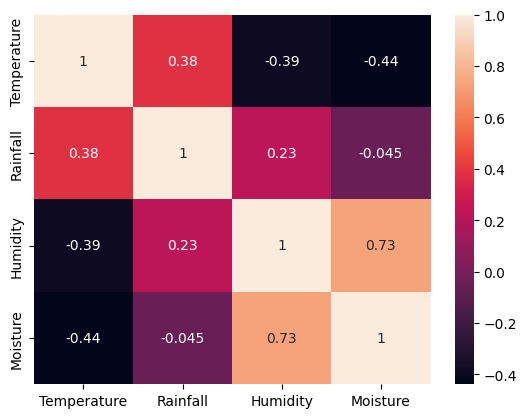

In [5]:
sns.heatmap(df[["Temperature","Rainfall","Humidity","Moisture"]].corr(),annot=True)

C:\Users\Shahil\AppData\Local\Temp\ipykernel_12432\2750951924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Temperature"][(df["Crop"]=="Rice")])


<Axes: xlabel='Temperature', ylabel='Density'>

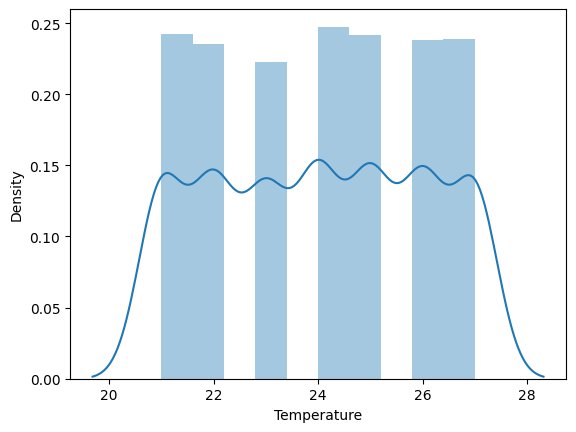

In [6]:
sns.distplot(df["Temperature"][(df["Crop"]=="Rice")])

C:\Users\Shahil\AppData\Local\Temp\ipykernel_12432\3825517243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rainfall"])


<Axes: xlabel='Rainfall', ylabel='Density'>

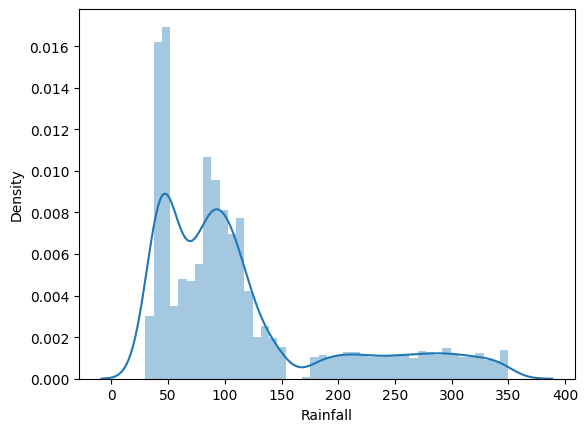

In [7]:
sns.distplot(df["Rainfall"])

<Axes: xlabel='Moisture', ylabel='Crop'>

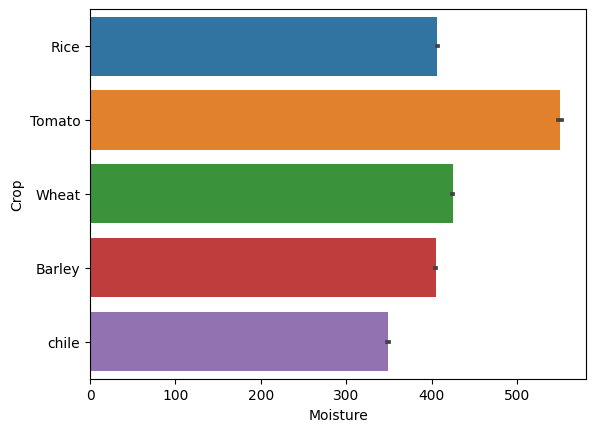

In [8]:
sns.barplot(x = "Moisture", y = "Crop",data = df)

In [9]:
cols=df.shape[1]
sns.pairplot(df, hue = 'Crop', diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values

SyntaxError: invalid syntax (3056714192.py, line 3)

In [10]:
cols=df.shape[1]
X=df.iloc[:,0:cols-1].values
y=df.iloc[:,cols-1:cols].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
log_fit = clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print(pred)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


['Barley' 'Rice' 'chile' ... 'chile' 'Wheat' 'Barley']


C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
accuracy = clf.score(X_test,y_test)
print(accuracy*100)

96.06060606060606


In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred,labels = ["Rice","Wheat","Barley","Tomato","Chile"])

array([[645,   0,   0,   0,   0],
       [  0, 614,  20,   0,   0],
       [  0,  21, 613,  35,   0],
       [  0,   6,  48, 576,   0],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [15]:
prob_pred = clf.predict_proba(X_test)
print(prob_pred)

[[9.67351206e-001 7.44346907e-159 3.26487936e-002 3.54497715e-012
  2.38664725e-028]
 [6.87558047e-141 1.00000000e+000 9.83145835e-114 1.81281257e-119
  1.55152128e-104]
 [5.46291956e-029 1.19230866e-090 9.84722741e-019 9.76272106e-007
  9.99999024e-001]
 ...
 [7.29309589e-029 1.05571403e-062 3.27598304e-017 3.67135747e-007
  9.99999633e-001]
 [2.99499218e-006 2.32470948e-138 1.82418149e-005 9.99978753e-001
  9.98448203e-009]
 [8.96411362e-001 3.77783169e-150 1.03588634e-001 4.69312738e-009
  6.87146262e-023]]


In [16]:
classes = clf.classes_ 
print(classes)

['Barley' 'Rice' 'Tomato' 'Wheat' 'chile']


In [17]:
values = [[int(x) for x in input("Enter the Tempertature,Rainfall,Humidity,Moisture in order: ").split()]]

Enter the Tempertature,Rainfall,Humidity,Moisture in order: 23 221 79 397


In [18]:
lr_proba_predict = clf.predict_proba(values)
print(lr_proba_predict)

[[2.88560770e-107 1.00000000e+000 1.51330952e-084 1.97142941e-095
  4.47084627e-088]]


In [19]:
df_pred = pd.DataFrame(data = prob_pred, columns = ['Barley', 'Rice', 'Tomato', 'Wheat', 'Chile'])
df_pred.head()

,Barley,Rice,Tomato,Wheat,Chile
0,9.673512e-01,7.443469e-159,3.264879e-02,3.544977e-12,2.386647e-28
1,6.875580e-141,1.000000e+00,9.831458e-114,1.812813e-119,1.551521e-104
2,5.462920e-29,1.192309e-90,9.847227e-19,9.762721e-07,9.999990e-01
3,2.207222e-07,4.285354e-159,7.086072e-07,9.999991e-01,5.187275e-09
4,1.590461e-165,1.000000e+00,2.035428e-134,1.820077e-139,3.449134e-121


In [20]:
clf.coef_

array([[-0.38308795, -0.93918505,  0.92436754,  0.17501102],
       [ 0.03850743,  2.44837817,  0.10023157, -0.95312437],
       [-0.631348  , -0.58529535,  0.60213735,  0.18860105],
       [ 0.44915116, -0.63430567, -0.39629486,  0.28863846],
       [ 0.52677736, -0.28959211, -1.2304416 ,  0.30087384]])

In [21]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [22]:
kfold = StratifiedKFold(n_splits=10)
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 4],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  5.0min finished
C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.998358208955224

In [23]:
rfc_prob = gsRFC.predict_proba(values)
print(rfc_prob)

[[0. 1. 0. 0. 0.]]


In [24]:
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01],
                  'C': [1, 10, 50]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,y_train)

SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   46.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  1.2min finished
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9977611940298508

In [25]:
svm_prob = gsSVMC.predict_proba(values)

In [26]:
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.01, 0.1, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 128 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 728 tasks      | elapsed:    6.6s
[Parallel(n_jobs=4)]: Done 793 out of 800 | elapsed:    7.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed:    7.1s finished
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [27]:
ada_prob = gsadaDTC.predict_proba(values)

In [30]:
print(gsadaDTC.best_score_ * 100)

99.77611940298509


[0.17042906 0.30228173 0.32614306 0.20114615]


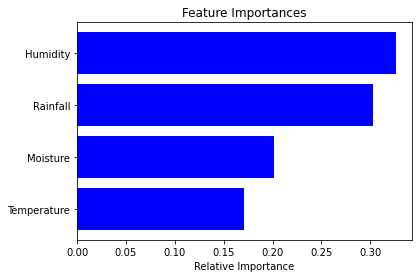

In [31]:
features = ['Temperature','Rainfall','Humidity','Moisture']
importances = RFC_best.feature_importances_
print(importances)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

[0.00221291 0.28286285 0.45142448 0.26349976]


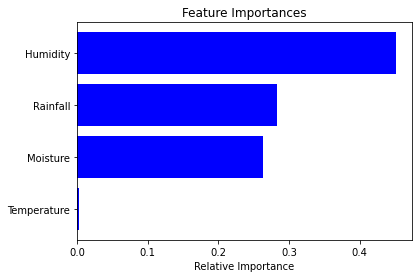

In [32]:
features = ['Temperature','Rainfall','Humidity','Moisture']
importances = ada_best.feature_importances_
print(importances)
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [33]:
from sklearn.neural_network import MLPClassifier

In [34]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(13,13,13), random_state=1)

In [35]:
clf.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(13, 13, 13), random_state=1,
              solver='lbfgs')

In [36]:
clf.predict(X_test)

array(['Barley', 'Rice', 'chile', ..., 'chile', 'Wheat', 'Barley'],
      dtype='<U6')

In [37]:
acc = clf.score(X_test,y_test)
print(acc*100)

96.72727272727273


In [38]:
ann_prob = clf.predict_proba(values)

In [39]:
final_prob = (lr_proba_predict + rfc_prob + svm_prob + ada_prob + ann_prob)/5
print(final_prob)

[[0.03785017 0.84825525 0.03803215 0.03791992 0.03794252]]


In [40]:
probabilities = np.ravel(final_prob)
d = {k:v for k,v in zip(classes,probabilities)}
print(d)

{'Barley': 0.037850165019511495, 'Rice': 0.8482552463411597, 'Tomato': 0.03803214618520508, 'Wheat': 0.037919923891685955, 'chile': 0.0379425185624377}


In [41]:
from operator import itemgetter
sort = sorted(d.items(), key=itemgetter(1),reverse = True)
crop = []
prob = []
for i,v in sort:
    crop.append(i.lower())
    prob.append(v)
final_d = {k:v for k,v in zip(crop,prob)}
print(final_d)

{'rice': 0.8482552463411597, 'tomato': 0.03803214618520508, 'chile': 0.0379425185624377, 'wheat': 0.037919923891685955, 'barley': 0.037850165019511495}


In [45]:
required = input("Enter the crop which you want to supply: ").lower()
if required == crop[0]:
    print(required+" crop can be grown")
elif required in crop[:3]:
    print("You can grown "+required+" crop. But it is preferred to grow "+crop[0])
elif required in crop[3:5]:
    print("Cannot grow "+required+" crop")
else:
    print("No such crop exists")

Enter the crop which you want to supply: wheat
Cannot grow wheat crop
